<a href="https://colab.research.google.com/github/ceciliasilvads/analise-funil-python/blob/main/An%C3%A1lise_de_Funil_(Python_Cerrado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Funil de Conversão na Prática com Python**
*por Cecília Souza*


### 🛠️**Case prático - EduMais Plataforma de cursos online**

🔎**Contexto**

> A EduMais é uma plataforma de cursos online voltada para iniciantes em tecnologia. Ela oferece cursos em diversas áreas como programação, design e análise de dados. O modelo de negócio é baseado em funil: os usuários podem visitar a plataforma, se cadastrar gratuitamente, assistir a uma aula experimental e, se gostarem, comprar cursos completos.

> Nos últimos meses, a equipe de marketing percebeu que o número de vendas não está crescendo na mesma proporção que o número de visitantes. Eles suspeitam que existam gargalos em alguma etapa da jornada, mas não sabem exatamente onde.

> Para investigar, a equipe coletou dados das etapas principais da jornada dos usuários:

  - **Visita:** Usuário acessa o site pela primeira vez.
  - **Cadastro:** Cria uma conta gratuita.
  - **Primeira aula:** Assiste a uma aula experimental de um curso.
  - **Compra:** Compra o primeiro curso completo.



#### 🎯**Objetivo da análise:**

> A análise busca entender o comportamento dos usuários no funil de conversão da EduMais.

**Queremos:**

- Quantificar quantos usuários passam por cada etapa do funil.
- Calcular as taxas de conversão entre cada etapa.
- Identificar gargalos (pontos de desistência).


**Por que isso é importante?**

> A partir da análise, a EduMais poderá focar esforços em otimizar a etapa correta, melhorando a experiência dos usuários e aumentando o faturamento sem necessariamente aumentar os investimentos em marketing.


**Perguntas a serem respondidas**
- Quantos usuários passam por cada etapa da jornada?
- Quais são as taxas de conversão entre as etapas?
- Em qual etapa ocorre a maior perda de usuários?
- Quanto tempo os usuários levam para avançar em cada etapa?

#### **0. Importações e base dedados**

In [ ]:
# Importando bibliotecas

import pandas as pd  # Trabalhar com dados em formato de tabela (análise e manipulação)
import matplotlib.pyplot as plt  # Criar gráficos estáticos (barras, linhas, histogramas)
import plotly.graph_objects as go  # Criar gráficos interativos (funil, dashboards, visualizações avançadas)

In [ ]:
# Carregando os dados

# URL do arquivo CSV no GitHub (use o link RAW)
url = "https://raw.githubusercontent.com/ceciliasilvads/analise-funil-python/main/Funil%20%20EduMais%20-%20DB%20-%20EduMais.csv"


df_edumais = pd.read_csv(url)
df_edumais.head(10)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,id,data_acesso,data_cadastro,data_primeira_aula,data_primeira_compra
0,1,07/07/2025,NaN,NaN,NaN
1,2,15/07/2025,NaN,NaN,NaN
2,3,07/07/2025,09/07/2025,09/07/2025,NaN
3,4,03/07/2025,04/07/2025,NaN,NaN
4,5,06/07/2025,06/07/2025,NaN,NaN
5,6,12/07/2025,14/07/2025,NaN,NaN
6,7,10/07/2025,12/07/2025,14/07/2025,NaN
7,8,12/07/2025,12/07/2025,14/07/2025,NaN
8,9,09/07/2025,09/07/2025,NaN,NaN
9,10,18/07/2025,19/07/2025,21/07/2025,NaN


#### **1. Explorando e preparando os dados**

In [ ]:
#Mostrando os tipos das colunas do dataframe
df_edumais.dtypes

,0
id,int64
data_acesso,object
data_cadastro,object
data_primeira_aula,object
data_primeira_compra,object


In [ ]:
# Alterando o tipo de dados da coluna
df_edumais['data_acesso'] = pd.to_datetime(df_edumais['data_acesso'], format="%d/%m/%Y", errors='coerce')

df_edumais['data_cadastro'] = pd.to_datetime(df_edumais['data_cadastro'], format="%d/%m/%Y", errors='coerce')

df_edumais['data_primeira_aula'] = pd.to_datetime(df_edumais['data_primeira_aula'], format="%d/%m/%Y", errors='coerce')

df_edumais['data_primeira_compra'] = pd.to_datetime(df_edumais['data_primeira_compra'], format="%d/%m/%Y", errors='coerce')

df_edumais.dtypes

,0
id,int64
data_acesso,datetime64[ns]
data_cadastro,datetime64[ns]
data_primeira_aula,datetime64[ns]
data_primeira_compra,datetime64[ns]


In [ ]:
# Verificando a quantidade de IDs

df_edumais.value_counts('id').sum()

np.int64(500)

#### **2. Respondendo as perguntas**

**Quantos usuários passam por cada etapa da jornada?**

In [ ]:
# Volume de usuários no funil

total_acesso = df_edumais['data_acesso'].notna().sum()
total_cadastro = df_edumais['data_cadastro'].notna().sum()
total_aula = df_edumais['data_primeira_aula'].notna().sum()
total_compra = df_edumais['data_primeira_compra'].notna().sum()

print("Total Acessos:", total_acesso)
print("Total Cadastros:", total_cadastro)
print("Total Primeira Aula:", total_aula)
print("Total Primeira Compra:", total_compra)

Total Acessos: 500
Total Cadastros: 369
Total Primeira Aula: 191
Total Primeira Compra: 83


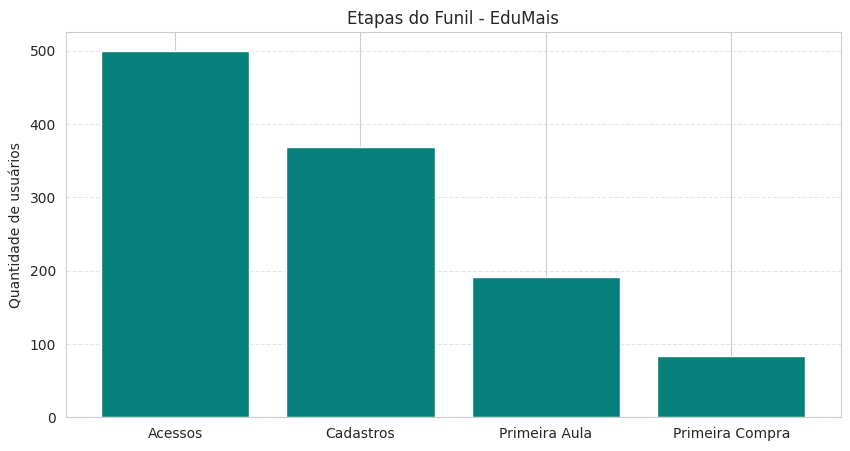

In [ ]:
# Visualizando o volume de leads por etapa
etapas = ["Acessos", "Cadastros", "Primeira Aula", "Primeira Compra"]
valores = [total_acesso, total_cadastro, total_aula, total_compra]

plt.figure(figsize=(10,5))
plt.bar(etapas, valores, color="#07807b")
plt.title("Etapas do Funil - EduMais")
plt.ylabel("Quantidade de usuários")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

✅ Conclusão:

Total de usuários por etapa:
- Acessou a plataforma - 500 usuários
- Realizou Cadastro - 369 usuários
- Assistiu a Primeira Aula - 191 usuários
- Realizou uma compra - 83 usuários

**Quais são as taxas de conversão entre as etapas?**

In [ ]:
# Conversão por etapa

conv_cadastro = (total_cadastro / total_acesso) * 100
conv_aula = (total_aula / total_cadastro) * 100
conv_compra = (total_compra / total_aula) * 100

print(f"Taxa de conversão Acesso -> Cadastro: {conv_cadastro:.1f}%")
print(f"Taxa de conversão Cadastro -> Primeira Aula: {conv_aula:.1f}%")
print(f"Taxa de conversão Primeira Aula -> Compra: {conv_compra:.1f}%")

Taxa de conversão Acesso -> Cadastro: 73.8%
Taxa de conversão Cadastro -> Primeira Aula: 51.8%
Taxa de conversão Primeira Aula -> Compra: 43.5%


In [ ]:
# conversão total do funil

conv_total = (total_compra / total_acesso) * 100

print(f"Taxa de conversão total do funil: {conv_total:.1f}%")

Taxa de conversão total do funil: 16.6%


In [ ]:
# Visualizando o funil volume e conversões

etapas = ["Acesso ao Site", "Cadastro Completo", "Primeira Aula", "Primeira Compra"]
valores = [total_acesso, total_cadastro, total_aula, total_compra]

fig = go.Figure(go.Funnel(
    y=etapas,
    x=valores,
    textinfo="value+percent previous"
))

fig.update_layout(
    title="Funil de Conversão - EduMais",
    font=dict(size=14),
    width=800,
    height=500
)

fig.show()

✅ Conclusão:

- Conversão Acesso -> Cadastro: 73.8%
- Conversão Cadastro -> Primeira Aula: 51.8%
- Conversão Primeira Aula -> Compra: 43.5%


A conversão total do funil da EduMais é de **16.6%**

**Em qual etapa ocorre a maior perda de usuários?**

In [ ]:
etapas = ["Acesso ao Site", "Cadastro Completo", "Primeira Aula", "Primeira Compra"]
valores = [total_acesso, total_cadastro, total_aula, total_compra]


percas_cadastro =  total_acesso - total_cadastro
percas_aula = total_cadastro - total_aula
percas_compra = total_aula - total_compra

print(f"As percas na etapa de Cadastro foi de {percas_cadastro} usuários")
print(f"As percas na etapa de Primeira Aula foi de {percas_aula} usuários")
print(f"As percas na etapa de Primeira Compra foi de {percas_compra} usuários")

As percas na etapa de Cadastro foi de 131 usuários
As percas na etapa de Primeira Aula foi de 178 usuários
As percas na etapa de Primeira Compra foi de 108 usuários


✅ Conclusão:

A maior perda de usuários ocorre entre Cadastro -> Primeira Aula, com **178** usuários a menos, o que representa a etapa mais crítica do funil da EduMais.

**Quanto tempo os usuários levam para avançar em cada etapa?**

In [ ]:
# Tempo médio por etapa

df_edumais['dias_ate_cadastro'] = (df_edumais['data_cadastro'] - df_edumais['data_acesso']).dt.days
df_edumais['dias_ate_aula'] = (df_edumais['data_primeira_aula'] - df_edumais['data_cadastro']).dt.days
df_edumais['dias_ate_compra'] = (df_edumais['data_primeira_compra'] - df_edumais['data_primeira_aula']).dt.days

print(f"Acesso -> Cadastro: {df_edumais['dias_ate_cadastro'].mean(skipna=True):.0f} dias")
print(f"Cadastro -> Primeira Aula: {df_edumais['dias_ate_aula'].mean(skipna=True):.0f} dias")
print(f"Primeira Aula -> Compra: {df_edumais['dias_ate_compra'].mean(skipna=True):.0f} dias")

Acesso -> Cadastro: 1 dias
Cadastro -> Primeira Aula: 1 dias
Primeira Aula -> Compra: 2 dias


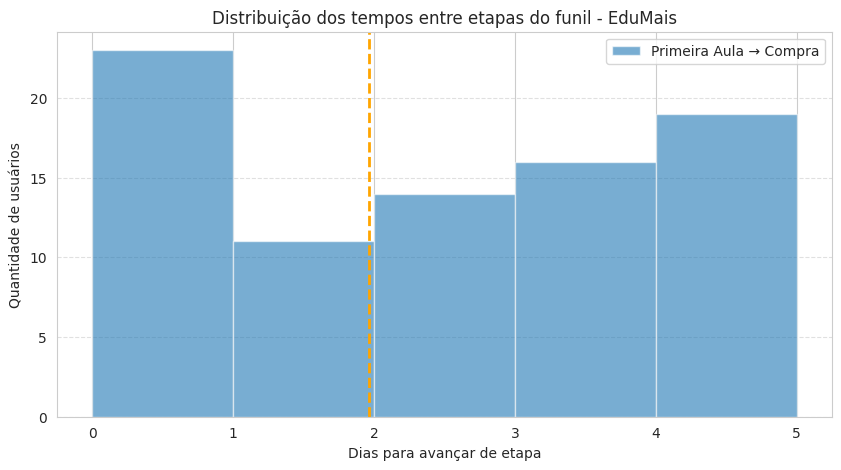

In [ ]:
# Visualizando o tempo média da etapa de Primeira Aula -> Compra:

plt.figure(figsize=(10,5))

plt.hist(df_edumais['dias_ate_compra'].dropna(), bins=range(0,6), alpha=0.6, label="Primeira Aula → Compra")
plt.axvline(df_edumais['dias_ate_compra'].mean(skipna=True), color='orange', linestyle='--', linewidth=2)

plt.title("Distribuição dos tempos entre etapas do funil - EduMais")
plt.xlabel("Dias para avançar de etapa")
plt.ylabel("Quantidade de usuários")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

✅ Conclusão:

O funil flui bem até a primeira aula, mas há maior tempo de espera na etapa final, o que pode aumentar a chance de desistência.

**Oportunidade:** trabalhar estratégias de engajamento e conversão logo após a primeira aula (ex.: e-mail, benefícios imediatos, descontos).

#### **3. Interpretação dos resultados**

A análise do funil de conversão da EduMais mostrou que, dos 500 usuários que acessaram a plataforma, apenas 83 chegaram à compra, resultando em uma conversão total de 16,6%. As maiores perdas ocorrem na etapa Cadastro -> Primeira Aula (178 usuários a menos), indicando um gargalo crítico no engajamento inicial após o cadastro. Além disso, o tempo médio para avançar até a compra é maior nessa última etapa (2 dias), aumentando o risco de desistência. As oportunidades de melhoria estão em estimular os usuários a assistirem a primeira aula logo após o cadastro e acelerar a decisão de compra com ações de engajamento, benefícios imediatos e comunicação ativa.


#### **🚀 Oportunidades de melhoria**

**Reduzir a queda entre Cadastro e Primeira Aula:**

- Implementar onboarding mais claro.

- Enviar notificações ou lembretes para incentivar a primeira aula.

**Acelerar a decisão de compra após a primeira aula:**

- Oferecer benefícios imediatos (descontos, bônus) após a aula experimental.

- Criar campanhas de e-mail marketing com provas sociais e urgência.

**Monitorar continuamente as conversões:**

- Acompanhar métricas diárias para detectar quedas fora do padrão.

## **🎁 Bônus: Dicas e recursos extras para análises de dados**

### **Atalhos e truques no Pandas**

- `df.info()`  Ver resumo do dataset (quantidade de linhas, colunas e tipos de dados).

- `df.describe()` Estatísticas básicas (média, mediana, mínimo, máximo).

- `df['coluna'].value_counts() `Contar valores únicos.

- `df.sort_values('coluna')` Ordenar os dados.

- `df.isna().sum() `Checar dados ausentes (NaN).

- `Documentação Pandas: ` https://pandas.pydata.org/docs/user_guide/index.html#user-guide

### **Libs de visualização**

- `Documentação Matplotlib:` https://matplotlib.org/stable/gallery/index.html
- `Documentação Plotly:` https://plotly.com/python/

### **Recursos gratuitos para dados**

- `Google Colab:` roda notebooks online sem precisar instalar nada.
- `Kaggle:` datasets gratuitos + notebooks prontos para aprender.
- `Datasets públicos:` dados.gov.br (Brasil)

### **Boas práticas**

- Sempre verifique os dados antes de analisar (valores nulos, tipos errados).
- Use nomes de variáveis claros (ex.: usuarios_por_mes, não apenas u).
- Documente os passos com comentários simples no código.
- Crie gráficos para validar insights (visual ajuda a entender melhor os dados).

# OBRIGADA POR ACOMPANHAR ATÉ AQUI ❤